<a href="https://colab.research.google.com/github/rajlm10/ZBC_ML_Workshop/blob/main/linear_regression_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [233]:
data=pd.read_csv("Multi_linear.txt", header=None,names=['Size_in_sq_ft','No_of_rooms','Price_in_USD'])
data.head()

,Size_in_sq_ft,No_of_rooms,Price_in_USD
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


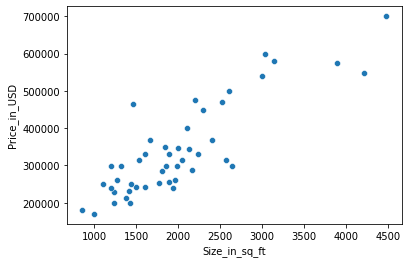

In [234]:
sns.scatterplot(data['Size_in_sq_ft'],data['Price_in_USD'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


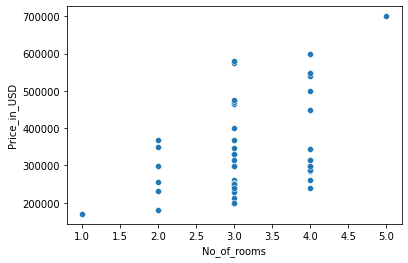

In [235]:
sns.scatterplot(data['No_of_rooms'],data['Price_in_USD'])

In [236]:
X=data.iloc[:,:-1].values
X.shape

(47, 2)

In [237]:
y=data.iloc[:,-1].values.reshape(47,1)
y.shape

(47, 1)

In [238]:
def featureNormalization(X):

    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm

In [239]:
X=featureNormalization(X)

In [240]:
X = np.append(np.ones((47,1)),X,axis=1)
X.shape

(47, 3)

In [241]:
X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [242]:
def compute_cost(X,y,theta):

    m=y.shape[0]
    predictions=X.dot(theta)

    square_err=(predictions - y)**2

    
    return 1/(2*m) * np.sum(square_err)

In [243]:
compute_cost(X,y,np.zeros((3,1)))

65591548106.45744

In [244]:
def gradientDescent(X,y,theta,alpha=0.1,num_iters=500):

    m=X.shape[0]
    costs=[]
    
    for i in range(num_iters):
        theta-=alpha*1/m*(np.dot(X.T,(np.dot(X,theta)-y)))
        costs.append(compute_cost(X,y,theta))
    
    return theta, costs


In [245]:
theta_matrix=np.random.rand(3,1)

In [246]:
thetas,costs=gradientDescent(X,y,theta_matrix,0.1,500)

In [247]:
thetas

array([[340412.65957447],
       [109447.79645983],
       [ -6578.35484435]])

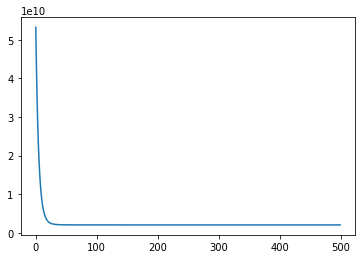

In [248]:
sns.lineplot(x=list(range(500)),y=costs)

In [249]:
def predict(X,thetas):
  return np.dot(X,thetas)

In [250]:
#feature normalisation of x values
x_sample = featureNormalization(np.array([[2100,3],[1000,1],[5000,5]]))
x_sample=np.append(np.ones((x_sample.shape[0],1)),x_sample,axis=1)
predict3=predict(x_sample,thetas)
#print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(np.round(predict3,0)))
predict3

array([[301491.12413973],
       [238191.78220051],
       [481555.07238317]])

In [251]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X[:,1:], y)

reg.coef_

array([[109447.79646964,  -6578.35485416]])

In [253]:
compute_cost(X[:,1:],y,reg.coef_.T)

59983669449.884186

In [255]:
x_sample

array([[ 1.        , -0.35561735,  0.        ],
       [ 1.        , -1.00758249, -1.22474487],
       [ 1.        ,  1.36319984,  1.22474487]])

In [256]:
reg.predict(x_sample[:,1:])

array([[301491.12413624],
       [238191.78220264],
       [481555.07238452]])

In [257]:
reg.predict(np.array([[2100,3],[1000,1],[5000,5]]))

array([[2.30161050e+08],
       [1.09781631e+08],
       [5.47546503e+08]])

In [258]:
X=data.iloc[:,:-1].values

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X , y)

reg.coef_

array([[  139.21067402, -8738.01911233]])

In [259]:
reg.predict(np.array([[2100,3],[1000,1],[5000,5]]))

array([[355726.26764283],
       [220070.5644481 ],
       [741961.18406929]])

In [260]:
compute_cost(X,y,reg.coef_.T)

6057172747.822495